In [1]:
# Importing Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [25]:
# Importing Required Modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('train_agriculture.xlsx')

In [5]:
test = pd.read_excel('test_agriculture.xlsx')

In [10]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [6]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [11]:
df = df.drop('ID', axis = 1)

In [12]:
df.shape

(4599, 9)

In [13]:
df.isnull().any()  

Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used           True
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

In [14]:
#filling nan with mean of top values
for col in df.columns:
    try:
        filler = df[col].describe()['top']
    except:
        filler = df[col].describe()['mean']
    df.loc[:,col] = df.fillna(filler)

In [15]:
df.isnull().any()   # No Null Values

Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used          False
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4599 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [18]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


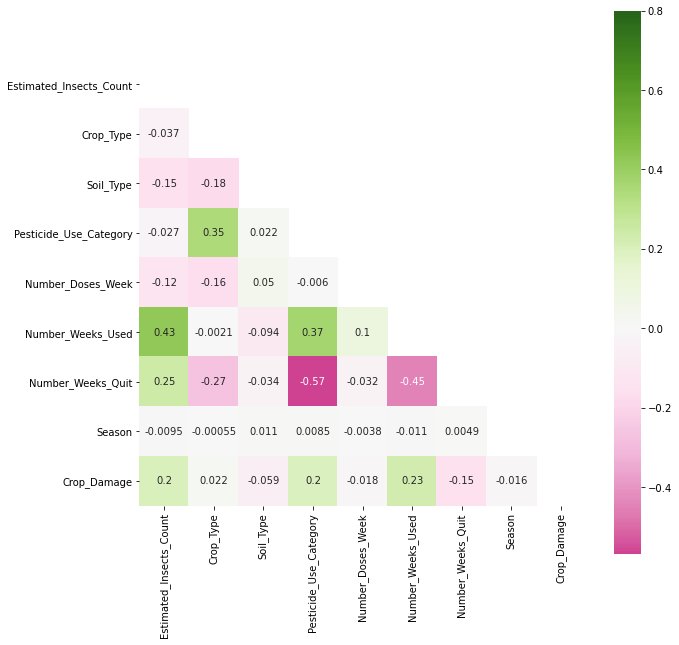

In [57]:
corrmat = df.corr()   # Corelation Matrix
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

We can observe that there is strong corelation between 'Number_Weeks_Used' & 'Estimated_Insects_Count' and also between 'Number_Weeks_Used' & 'Pesticide_Use_Category'

In [19]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

### Model Building 

In [20]:
X = df.drop('Crop_Damage',axis = 1).values    # Attributes

In [21]:
y = df['Crop_Damage'].values     # The target variable

In [44]:
#Importing Scaler
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Splitting into training and Validation
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=48)

In [46]:
#Building Function for Model Testing
def classification_function(model_list):
    for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print("accuracy_score: ",accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print('\n')

In [47]:
#List of Models to be tested
model_list = [KMeans(),LogisticRegression(),SVC(),RandomForestClassifier()]

In [48]:
classification_function(model_list)

Model Name : KMeans()
accuracy_score:  0.10978260869565218


Model Name : LogisticRegression()
accuracy_score:  0.8076086956521739


Model Name : SVC()
accuracy_score:  0.8217391304347826


Model Name : RandomForestClassifier()
accuracy_score:  0.8054347826086956




We can observe that the best model is SVC

#### Parameters Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [54]:
svm = SVC(kernel='rbf')

In [56]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [58]:
grid_search.score(X_train, y_train)

0.8393585213373199

In [60]:
grid_search.score(X_test, y_test)

0.8239130434782609

### Running the Model on Test Dataset

In [59]:
test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [63]:
test.shape

(1199, 9)

In [62]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [64]:
#filling nan with mean of top values
for col in test.columns:
    try:
        filler = test[col].describe()['top']
    except:
        filler = test[col].describe()['mean']
    test.loc[:,col] = test.fillna(filler)

In [65]:
test = test.drop('ID', axis = 1)

In [76]:
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3
1195,1132,0,1,2,40,25.000000,3,1
1196,1132,0,1,2,20,13.000000,23,1
1197,1212,0,1,2,10,35.000000,5,1


In [81]:
test_scaled = scaler.transform(test)

In [82]:
output = grid_search.predict(test_scaled)

In [83]:
# Saving the Best Model
import joblib

# Saving the model as a pickle in a file
joblib.dump(grid_search,"agridata.pkl")

['agridata.pkl']